In [36]:
import pandas as pd
import numpy as np

In [37]:
enhancer1 = pd.read_csv('/Users/huajingru/Desktop/Fall_2024/Capstone/CDS-2024-Fall-Capstone/workflow/scripts/model_results/model_results_cells_01.csv'
                        ,header=0, names=["gene_1", "enhancer1_1", "enhancer2_1", "intercept_1", "beta.estimate_1", "beta.pvalue_1", "bootstrap.pvalue_1"])
enhancer2 = pd.read_csv('/Users/huajingru/Desktop/Fall_2024/Capstone/CDS-2024-Fall-Capstone/workflow/scripts/model_results/model_results_cells_10.csv'
                        ,header=0,names=["gene_2", "enhancer1_2", "enhancer2_2", "intercept_2", "beta.estimate_2", "beta.pvalue_2", "bootstrap.pvalue_2"])
interaction = pd.read_csv('/Users/huajingru/Desktop/Fall_2024/capstone store/hpc_model_results/CD8-naive/model_results_cells_00.csv'
                          ,header=0, names=["gene", "enhancers", "intercept", "beta.estimate", "beta.pvalue", "bootstrap.pvalue"])

In [38]:
interaction[['enhancer1', 'enhancer2']] = interaction['enhancers'].str.split('_', expand=True)
interaction = interaction.drop(columns=['enhancers'])

,gene,intercept,beta.estimate,beta.pvalue,bootstrap.pvalue,enhancer1,enhancer2
0,TNFRSF1B,-11.558370,0.278171,0.036216,0.0520,chr1-12177548-12178532,chr1-12617039-12618665
1,PADI4,-10.418427,0.977661,0.006463,0.0004,chr1-17281571-17282607,chr1-17307936-17308894
2,RPL11,-5.439925,-0.005488,0.652570,0.8200,chr1-23483354-23484969,chr1-23530563-23531556
3,RPL11,-5.431316,-0.009784,0.340488,0.4600,chr1-23483354-23484969,chr1-23553945-23555196
4,RPL11,-5.410410,-0.021906,0.058683,0.2000,chr1-23530563-23531556,chr1-23553945-23555196
...,...,...,...,...,...,...,...
2744,RPL10,-5.351887,-0.042515,0.000551,0.0588,chrX-154096425-154098209,chrX-154457428-154458962
2745,RPL10,-5.295131,0.003469,0.822471,1.0000,chrX-154096425-154098209,chrX-154750320-154751610
2746,RPL10,-5.255075,-0.004522,0.764379,0.7400,chrX-154411067-154412866,chrX-154457428-154458962
2747,RPL10,-5.246828,0.015352,0.418725,0.7200,chrX-154411067-154412866,chrX-154750320-154751610


In [39]:
merged_df = pd.merge(enhancer1, enhancer2, left_on=['gene_1','enhancer1_1', 'enhancer2_1'], 
                     right_on=['gene_2','enhancer1_2', 'enhancer2_2'])
merged_df = pd.merge(merged_df, interaction, left_on=['gene_1','enhancer1_1', 'enhancer2_1'], 
                     right_on=['gene','enhancer1', 'enhancer2'])

,gene_1,enhancer1_1,enhancer2_1,intercept_1,beta.estimate_1,beta.pvalue_1,bootstrap.pvalue_1,gene_2,enhancer1_2,enhancer2_2,...,beta.estimate_2,beta.pvalue_2,bootstrap.pvalue_2,gene,intercept,beta.estimate,beta.pvalue,bootstrap.pvalue,enhancer1,enhancer2
0,LCK,chr1-32200179-32201787,chr1-32649852-32651753,-8.105940,-0.073992,0.508625,0.460,LCK,chr1-32200179-32201787,chr1-32649852-32651753,...,0.033230,0.621809,0.86,LCK,-7.974779,-0.036491,0.332858,0.40,chr1-32200179-32201787,chr1-32649852-32651753
1,LCK,chr1-32200179-32201787,chr1-32753526-32754711,-7.912118,-0.075151,0.182540,0.120,LCK,chr1-32200179-32201787,chr1-32753526-32754711,...,0.079242,0.317939,0.46,LCK,-8.005067,-0.080209,0.165868,0.38,chr1-32200179-32201787,chr1-32753526-32754711
2,LCK,chr1-32239897-32241659,chr1-32334992-32336553,-8.071332,-0.151201,0.098589,0.146,LCK,chr1-32239897-32241659,chr1-32334992-32336553,...,-0.004294,0.937638,0.86,LCK,-8.041624,-0.050622,0.184711,0.32,chr1-32239897-32241659,chr1-32334992-32336553
3,LCK,chr1-32239897-32241659,chr1-32350751-32352122,-8.023720,-0.164565,0.058599,0.080,LCK,chr1-32239897-32241659,chr1-32350751-32352122,...,-0.040145,0.467279,0.54,LCK,-7.977346,-0.057361,0.136570,0.34,chr1-32239897-32241659,chr1-32350751-32352122
4,LCK,chr1-32239897-32241659,chr1-32649852-32651753,-8.109339,-0.199903,0.116432,0.220,LCK,chr1-32239897-32241659,chr1-32649852-32651753,...,0.003487,0.956163,0.88,LCK,-8.035636,-0.047141,0.235760,0.36,chr1-32239897-32241659,chr1-32649852-32651753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,CTSS,chr1-150281079-150282823,chr1-151189514-151190574,-8.753406,-0.022949,0.777874,0.680,CTSS,chr1-150281079-150282823,chr1-151189514-151190574,...,0.115474,0.193441,0.14,CTSS,-8.529281,-0.011549,0.797746,0.80,chr1-150281079-150282823,chr1-151189514-151190574
82,CTSS,chr1-150281079-150282823,chr1-151197881-151199680,-8.679021,-0.130639,0.158481,0.320,CTSS,chr1-150281079-150282823,chr1-151197881-151199680,...,-0.117475,0.162841,0.26,CTSS,-8.580631,-0.055729,0.194313,0.24,chr1-150281079-150282823,chr1-151197881-151199680
83,CTSS,chr1-150514839-150516440,chr1-150548569-150549514,-8.547951,-0.062699,0.365945,0.280,CTSS,chr1-150514839-150516440,chr1-150548569-150549514,...,-0.052080,0.667262,0.74,CTSS,-8.562720,-0.023026,0.762194,0.80,chr1-150514839-150516440,chr1-150548569-150549514
84,CTSS,chr1-150514839-150516440,chr1-150696198-150697796,-8.337776,-0.038754,0.689065,0.640,CTSS,chr1-150514839-150516440,chr1-150696198-150697796,...,0.088718,0.270381,0.44,CTSS,-8.387378,0.010824,0.803713,0.64,chr1-150514839-150516440,chr1-150696198-150697796


In [41]:
merged_df.columns

Index(['gene_1', 'enhancer1_1', 'enhancer2_1', 'intercept_1',
       'beta.estimate_1', 'beta.pvalue_1', 'bootstrap.pvalue_1', 'gene_2',
       'enhancer1_2', 'enhancer2_2', 'intercept_2', 'beta.estimate_2',
       'beta.pvalue_2', 'bootstrap.pvalue_2', 'gene', 'intercept',
       'beta.estimate', 'beta.pvalue', 'bootstrap.pvalue', 'enhancer1',
       'enhancer2'],
      dtype='object')

In [42]:
#merged_df = pd.concat([enhancer1, enhancer2, interaction], axis=1, ignore_index=True)
merged_df = merged_df[['gene_1', 'enhancer1_1', 'enhancer2_1', 'intercept_1',
       'beta.estimate_1', 'beta.pvalue_1', 'bootstrap.pvalue_1', 'intercept_2', 'beta.estimate_2',
       'beta.pvalue_2', 'bootstrap.pvalue_2', 'intercept',
       'beta.estimate', 'beta.pvalue', 'bootstrap.pvalue']]
merged_df.columns = ['gene', 'enhancer1', 'enhancer2', 'intercept_enhancer1', 'beta.estimate_enhancer1',
        'beta.pvalue_enhancer1',
       'bootstrap.pvalue_enhancer1','intercept_enhancer2', 'beta.estimate_enhancer2',
        'beta.pvalue_enhancer2',
       'bootstrap.pvalue_enhancer2','intercept_both', 'beta.estimate_both',  'beta.pvalue_both',
       'bootstrap.pvalue_both']

,gene,enhancer1,enhancer2,intercept_enhancer1,beta.estimate_enhancer1,beta.pvalue_enhancer1,bootstrap.pvalue_enhancer1,intercept_enhancer2,beta.estimate_enhancer2,beta.pvalue_enhancer2,bootstrap.pvalue_enhancer2,intercept_both,beta.estimate_both,beta.pvalue_both,bootstrap.pvalue_both
0,LCK,chr1-32200179-32201787,chr1-32649852-32651753,-8.105940,-0.073992,0.508625,0.460,-8.009984,0.033230,0.621809,0.86,-7.974779,-0.036491,0.332858,0.40
1,LCK,chr1-32200179-32201787,chr1-32753526-32754711,-7.912118,-0.075151,0.182540,0.120,-7.998069,0.079242,0.317939,0.46,-8.005067,-0.080209,0.165868,0.38
2,LCK,chr1-32239897-32241659,chr1-32334992-32336553,-8.071332,-0.151201,0.098589,0.146,-7.995366,-0.004294,0.937638,0.86,-8.041624,-0.050622,0.184711,0.32
3,LCK,chr1-32239897-32241659,chr1-32350751-32352122,-8.023720,-0.164565,0.058599,0.080,-7.980530,-0.040145,0.467279,0.54,-7.977346,-0.057361,0.136570,0.34
4,LCK,chr1-32239897-32241659,chr1-32649852-32651753,-8.109339,-0.199903,0.116432,0.220,-7.999925,0.003487,0.956163,0.88,-8.035636,-0.047141,0.235760,0.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,CTSS,chr1-150281079-150282823,chr1-151189514-151190574,-8.753406,-0.022949,0.777874,0.680,-8.455980,0.115474,0.193441,0.14,-8.529281,-0.011549,0.797746,0.80
82,CTSS,chr1-150281079-150282823,chr1-151197881-151199680,-8.679021,-0.130639,0.158481,0.320,-8.376153,-0.117475,0.162841,0.26,-8.580631,-0.055729,0.194313,0.24
83,CTSS,chr1-150514839-150516440,chr1-150548569-150549514,-8.547951,-0.062699,0.365945,0.280,-8.675521,-0.052080,0.667262,0.74,-8.562720,-0.023026,0.762194,0.80
84,CTSS,chr1-150514839-150516440,chr1-150696198-150697796,-8.337776,-0.038754,0.689065,0.640,-8.724204,0.088718,0.270381,0.44,-8.387378,0.010824,0.803713,0.64


In [45]:
significant = merged_df[(merged_df['beta.pvalue_enhancer1'] >= 0.05) & (merged_df['beta.pvalue_enhancer2'] >= 0.05) & 
                        (merged_df['beta.pvalue_both'] >= 0.05)]
#filter out based on pvalues

,gene,enhancer1,enhancer2,intercept_enhancer1,beta.estimate_enhancer1,beta.pvalue_enhancer1,bootstrap.pvalue_enhancer1,intercept_enhancer2,beta.estimate_enhancer2,beta.pvalue_enhancer2,bootstrap.pvalue_enhancer2,intercept_both,beta.estimate_both,beta.pvalue_both,bootstrap.pvalue_both
0,LCK,chr1-32200179-32201787,chr1-32649852-32651753,-8.105940,-0.073992,0.508625,0.4600,-8.009984,0.033230,0.621809,0.86,-7.974779,-0.036491,0.332858,0.4000
1,LCK,chr1-32200179-32201787,chr1-32753526-32754711,-7.912118,-0.075151,0.182540,0.1200,-7.998069,0.079242,0.317939,0.46,-8.005067,-0.080209,0.165868,0.3800
2,LCK,chr1-32239897-32241659,chr1-32334992-32336553,-8.071332,-0.151201,0.098589,0.1460,-7.995366,-0.004294,0.937638,0.86,-8.041624,-0.050622,0.184711,0.3200
3,LCK,chr1-32239897-32241659,chr1-32350751-32352122,-8.023720,-0.164565,0.058599,0.0800,-7.980530,-0.040145,0.467279,0.54,-7.977346,-0.057361,0.136570,0.3400
4,LCK,chr1-32239897-32241659,chr1-32649852-32651753,-8.109339,-0.199903,0.116432,0.2200,-7.999925,0.003487,0.956163,0.88,-8.035636,-0.047141,0.235760,0.3600
5,LCK,chr1-32239897-32241659,chr1-32753526-32754711,-7.919893,-0.108074,0.091584,0.1316,-8.005971,0.046022,0.546334,0.88,-7.959592,-0.060502,0.332701,0.3800
6,LCK,chr1-32334992-32336553,chr1-32350751-32352122,-8.049303,0.004106,0.950904,0.9200,-8.085898,-0.027367,0.702949,0.80,-8.104131,-0.014297,0.660735,0.6200
7,LCK,chr1-32334992-32336553,chr1-32649852-32651753,-8.152512,0.033856,0.733801,0.7600,-8.129391,0.043030,0.585784,0.56,-8.037538,0.014595,0.703677,0.8200
8,LCK,chr1-32334992-32336553,chr1-32753526-32754711,-7.938692,-0.010510,0.842210,0.8400,-8.096493,-0.009104,0.930758,1.00,-8.075752,0.019565,0.650615,0.6600
9,LCK,chr1-32350751-32352122,chr1-32649852-32651753,-8.120107,-0.051299,0.618142,0.6200,-8.057279,0.014208,0.847125,0.80,-7.991368,-0.006016,0.869891,0.9200


In [46]:
betas = significant[['gene', 'enhancer1', 'enhancer2','beta.estimate_enhancer1','beta.estimate_enhancer2', 'beta.estimate_both']]

,gene,enhancer1,enhancer2,beta.estimate_enhancer1,beta.estimate_enhancer2,beta.estimate_both
0,LCK,chr1-32200179-32201787,chr1-32649852-32651753,-0.073992,0.033230,-0.036491
1,LCK,chr1-32200179-32201787,chr1-32753526-32754711,-0.075151,0.079242,-0.080209
2,LCK,chr1-32239897-32241659,chr1-32334992-32336553,-0.151201,-0.004294,-0.050622
3,LCK,chr1-32239897-32241659,chr1-32350751-32352122,-0.164565,-0.040145,-0.057361
4,LCK,chr1-32239897-32241659,chr1-32649852-32651753,-0.199903,0.003487,-0.047141
5,LCK,chr1-32239897-32241659,chr1-32753526-32754711,-0.108074,0.046022,-0.060502
6,LCK,chr1-32334992-32336553,chr1-32350751-32352122,0.004106,-0.027367,-0.014297
7,LCK,chr1-32334992-32336553,chr1-32649852-32651753,0.033856,0.043030,0.014595
8,LCK,chr1-32334992-32336553,chr1-32753526-32754711,-0.010510,-0.009104,0.019565
9,LCK,chr1-32350751-32352122,chr1-32649852-32651753,-0.051299,0.014208,-0.006016


In [47]:
betas['opposite_sign_interaction'] = (
    ((betas['beta.estimate_enhancer1'] > 0) & (betas['beta.estimate_enhancer2'] > 0) & (betas['beta.estimate_both'] < 0)) |
    ((betas['beta.estimate_enhancer1'] < 0) & (betas['beta.estimate_enhancer2'] < 0) & (betas['beta.estimate_both'] > 0))
)

opposite_sign = betas[betas['opposite_sign_interaction']]

/var/folders/hb/pn_3c51d1fj1n2jntgjrxmpm0000gn/T/ipykernel_72662/2482289220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  betas['opposite_sign_interaction'] = (


,gene,enhancer1,enhancer2,beta.estimate_enhancer1,beta.estimate_enhancer2,beta.estimate_both,opposite_sign_interaction
8,LCK,chr1-32334992-32336553,chr1-32753526-32754711,-0.010510,-0.009104,0.019565,True
12,SMAP2,chr1-40152861-40153902,chr1-40257250-40258543,-0.186481,-0.013510,0.042373,True
16,PLK3,chr1-44799651-44801041,chr1-44813385-44814046,-0.003976,-0.270556,0.082817,True
24,JUN,chr1-58545580-58547044,chr1-58903204-58904272,-0.019261,-0.002321,0.038388,True
38,GBP1,chr1-89272246-89273541,chr1-89309979-89311237,0.119739,0.160377,-0.190627,True
76,CTSS,chr1-150281079-150282823,chr1-150696198-150697796,-0.177942,-0.020414,0.010286,True


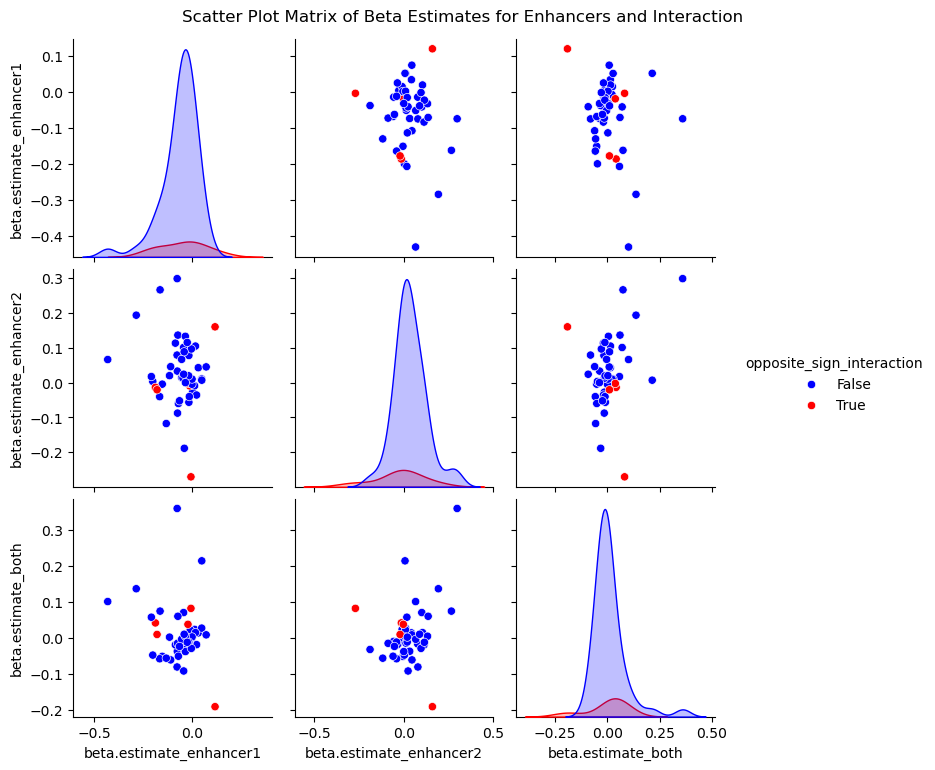

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot pair plot of beta estimates
sns.pairplot(betas, vars=['beta.estimate_enhancer1', 'beta.estimate_enhancer2', 'beta.estimate_both'], 
             hue='opposite_sign_interaction', palette={True: 'red', False: 'blue'})
plt.suptitle("Scatter Plot Matrix of Beta Estimates for Enhancers and Interaction", y=1.02)
plt.show()

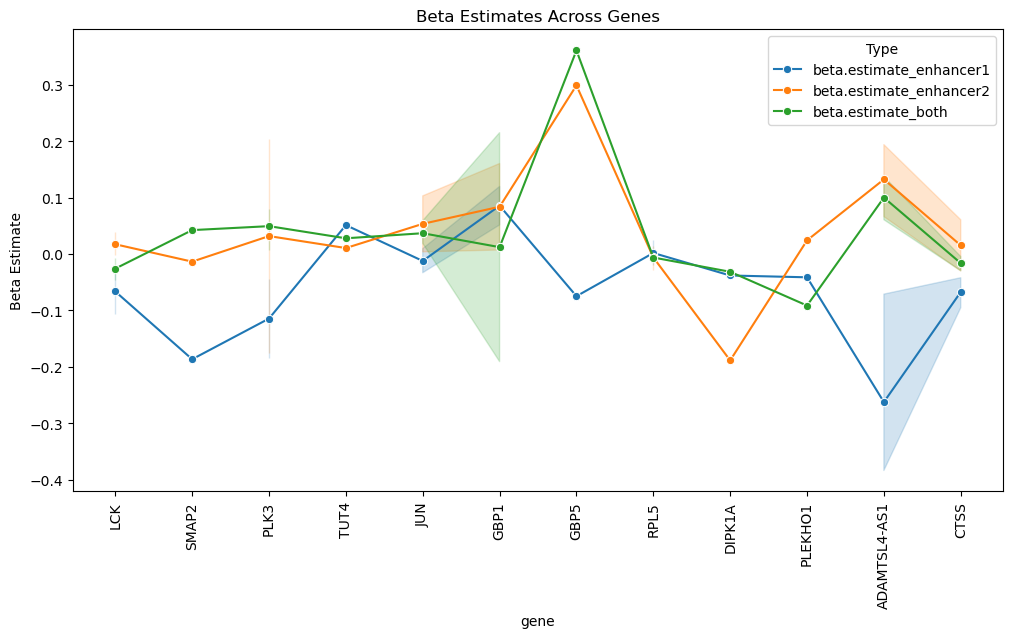

In [49]:
# Melt data for line plot
line_plot_df = betas.melt(id_vars='gene', value_vars=['beta.estimate_enhancer1', 'beta.estimate_enhancer2', 'beta.estimate_both'], 
                       var_name='Type', value_name='Beta Estimate')

# Line plot for each gene
plt.figure(figsize=(12, 6))
sns.lineplot(x='gene', y='Beta Estimate', hue='Type', data=line_plot_df, marker='o')
plt.xticks(rotation=90)
plt.title("Beta Estimates Across Genes")
plt.show()